# **PERKENALAN**

In [4]:
'''
=================================================
Project Exploratory Data Analytics

This project was created to discuss and explore analytics from the perspective of a data analyst. This EDA will perform basic analysis with the final result visualized in Tableu.
=================================================
'''

'\n=================================================\nMILESTONE 1\n\nNama  : Devin Lee\nBatch : HCK-009\n\nMilestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 0.\n=================================================\n'


URL Dashboard : https://public.tableau.com/app/profile/devin.lee1049/viz/hck-009_dashboard_devin_lee/Dashboard1?publish=yes

# **IDENTIFIKASI MASALAH**

### TOPIK PERMASALAHAN
---

Author dan Publisher ingin mengetahui apa saja genre terbaik dengan rating > 4.5 dalam kurun waktu 1 tahun terakhir. Dengan tujuan untuk meningkatkan penjualan buku di market

### PROBLEM STATEMENT
---
Mengetahui genre buku terbaik dalam kurun waktu 1 tahun terakhir yang bertujuan untuk meningkatkan tingkat penjualan kindle book di market.

### PENJABARAN MASALAH
---
#### SMART Statement:
1. *SPESIFIC*: Mengidentifikasi kindle book yang terlaris berdasarkan dari faktor penjualan, stars/rating, dan harga

2. *MEASURABLE* : Menganalisa korelasi antara stars/rating, dan harga yang bertujuan untuk mengetahui apakah harga mempengaruhi kepuasan pembeli

3. *ACHIEVABLE* : Mengembangkan insight untuk dapat menjadi best seller berdasarkan dari genre, dengan rentang harga yang baik dengan confidence interval by 95%.

4. *RELEVANT*: Dapat dijadikan sebagai insight untuk author ataupun publisher untuk mengoptimasikan penjualan buku berdasarkan preferensi market

5. *TIME-BOUND*: Menyelesaikan analysis, memberikan insight, rekomendasi dan visualisasi dengan batasan waktu 3 bulan.

#### 5W + 1H STATEMENT:  
1. **WHAT**= Mengetahui Central Tendency dari rating dan price. (Deskriptif)
2. **WHAT**= Mengetahui Distribusi dari rating dan price. (Deskriptif)
3. **HOW**= Mengetahui bagaimana adanya keterdepatan outliers pada rating dan price (Deskriptif), dan melakukan handling jika terdapat outliers.
4. **WHAT**= Berapa harga untuk buku dengan rating lebih dari 4.5?
5. **HOW**= Genre/Category yang paling sering muncul pada buku dengan rating lebih dari 4.5
6. **WHAT**= Total Buku dengan Rating >= 4.5 pada tahun 2020 - 2023
7. **WHAT**= Berapa confidential Interval untuk harga yang baik dengan range confidence 95%?
8. **HOW**= Korelasi antara rating dengan harga yang bertujuan untuk mengetahui apakah harga mempengaruhi kepuasan pembeli (inferensial)

# **LOADING DATA**

A. Loading Data

In [5]:
# Import Pandas
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
import numpy as np
from sklearn.utils import resample
from scipy.stats import sem

# Url data from kaggle
url_data = 'https://www.kaggle.com/datasets/asaniczka/amazon-kindle-books-dataset-2023-130k-books'


df = pd.read_csv("kindle_data-v2.csv")
df.head()

C:\Users\leede\AppData\Local\Temp\ipykernel_14716\1762978719.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


B. Explore Data

In [6]:
# Cek missing value 
df.isna().sum()

''' 
Fungsi .isna() ini adalah untuk mengetahui seberapa banyak null di seluruh column table. Dengan kombinasi .sum(), maka didapatkan total jumlah Missing Value pada tabel. Berdasarkan dari fungsi ini didapatkan beberapa column yang memiliki value missing. Diantaranya adalah column 'Author','soldBy', dan 'published_data'.
'''

" \nFungsi .isna() ini adalah untuk mengetahui seberapa banyak null di seluruh column table. Dengan kombinasi .sum(), maka didapatkan total jumlah Missing Value pada tabel. Berdasarkan dari fungsi ini didapatkan beberapa column yang memiliki value missing. Diantaranya adalah column 'Author','soldBy', dan 'published_data'.\n"

In [7]:
# Untuk melihat type data di seluruh column
df.dtypes
''' 
Berdasarkan dari type data, ada bagian column yang perlu diubah type datanya, seperti pada column 'publishedDate', column ini masih memiliki type data berupa object. Dimana type object itu sendiri menandakan bahwa value pada column tersebut memiliki beberapa type data, kemungkinan hal ini disebabkan terdapatnya special character pada value. Maka perlu dilakukan perubahan data menjadi datetime. 
'''

" \nBerdasarkan dari type data, ada bagian column yang perlu diubah type datanya, seperti pada column 'publishedDate', column ini masih memiliki type data berupa object. Dimana type object itu sendiri menandakan bahwa value pada column tersebut memiliki beberapa type data, kemungkinan hal ini disebabkan terdapatnya special character pada value. Maka perlu dilakukan perubahan data menjadi datetime. \n"

In [8]:
# Cek value pada column reviews
df['reviews'].unique()
'''
Fungsi diatas berguna untuk melihat apakah ada unique character selain 0 pada column reviews. Berdasarkan dari hasil tersebut didapatkan bahwa seluruh data pada Column reviews hanya ada angka 0. Besar kemungkinan terdapat kesalahan input pada dataset yang membuat column reviews tersebut tidak tercantum, dan juga kemungkinan untuk bagian reviews memang hasil seluruh datanya adalah Null, tidak ada reviews pada website tersebut. Karena itu, column 'reviews' perlu dihilangkan.
'''

"\nFungsi diatas berguna untuk melihat apakah ada unique character selain 0 pada column reviews. Berdasarkan dari hasil tersebut didapatkan bahwa seluruh data pada Column reviews hanya ada angka 0. Besar kemungkinan terdapat kesalahan input pada dataset yang membuat column reviews tersebut tidak tercantum, dan juga kemungkinan untuk bagian reviews memang hasil seluruh datanya adalah Null, tidak ada reviews pada website tersebut. Karena itu, column 'reviews' perlu dihilangkan.\n"

**Kesimpulan Explore Data:**  
Berdasarkan Dari explore data diatas, ada beberapa column yang perlu dilakukan cleaning, diantaranya:
1. Menghapus missing value pada seluruh column
2. Menggantikan type data pada column sesuai kebutuhan
3. Menghapus column 'reviews', karena value pada column tersebut hanya '0', yang artinya data ini tidak dibutuhkan
4. Menggantikan nama column sesuai dengan proper case 'title' (optional)


# **DATA CLEANING**

A. Menghapus missing value pada seluruh column

In [9]:
# Menghapus missing value pada seluruh column
df_clean_na = df.dropna()
df_clean_na.shape
''' 
Penghapusan missing value sangat penting sekali ketika kita akan melakukan analisis, ketika masih adanya keterdapatan missing value pada table maka akan mempengaruhi hasil output analisa. Pada proses ini, menghilangkan missing value menggunakan .dropna(), fungsi ini memiliki peran untuk menghapus missing value, dimana empty parentheses diartikan sebagai seluruh data. ketika fungsi .dropna() dilakukan, seluruh rows yang memiliki missing value akan dihilangkan.

Total rows sebelum dihapus missing value = 133102
Total rows sesudah dihapus missing value = 77800
'''

' \nPenghapusan missing value sangat penting sekali ketika kita akan melakukan analisis, ketika masih adanya keterdapatan missing value pada table maka akan mempengaruhi hasil output analisa. Pada proses ini, menghilangkan missing value menggunakan .dropna(), fungsi ini memiliki peran untuk menghapus missing value, dimana empty parentheses diartikan sebagai seluruh data. ketika fungsi .dropna() dilakukan, seluruh rows yang memiliki missing value akan dihilangkan.\n\nTotal rows sebelum dihapus missing value = 133102\nTotal rows sesudah dihapus missing value = 77800\n'

B. Menggantikan type data pada column 'publishedData'

In [59]:
# Menggantikan type data column 'publishedDate'
df_clean_na['publishedDate'] = pd.to_datetime(df_clean_na['publishedDate'])

''' 
publishedDate perlu digantikan type data, dimana column ini sebelumnya memiliki type data berupa 'object', maka perlu digantikan type data tersebut menjadi 'datetime'. Ada beberapa alasan kenapa waktu perlu digantikan ke type datetime, alasan pertama adalah, ketika kita melakukan visualisasi, type datetime ini dapat menghandle object datetime sangat efektif ketika kita membuat time series plot. Alasan selanjutnya adalah kita dapat melakukan analisa ataupun perhitungan secara date-spesific, sebagai contoh, kita dapat dengan sangat mudah untuk mengekstraksi tahun, bulan, dan hari sesuai keinginan.

Fungsi yang digunakan untuk menggantikan data type menjadi format date adalah dengan menggunakan fungsi .to_datetime(). Dimana fungsi ini akan mengubah format atau type column 'publishedDate' menjadi type datetime
'''

C:\Users\leede\AppData\Local\Temp\ipykernel_14716\2582536296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_na['publishedDate'] = pd.to_datetime(df_clean_na['publishedDate'])


" \npublishedDate perlu digantikan type data, dimana column ini sebelumnya memiliki type data berupa 'object', maka perlu digantikan type data tersebut menjadi 'datetime'. Ada beberapa alasan kenapa waktu perlu digantikan ke type datetime, alasan pertama adalah, ketika kita melakukan visualisasi, type datetime ini dapat menghandle object datetime sangat efektif ketika kita membuat time series plot. Alasan selanjutnya adalah kita dapat melakukan analisa ataupun perhitungan secara date-spesific, sebagai contoh, kita dapat dengan sangat mudah untuk mengekstraksi tahun, bulan, dan hari sesuai keinginan.\n\nFungsi yang digunakan untuk menggantikan data type menjadi format date adalah dengan menggunakan fungsi .to_datetime(). Dimana fungsi ini akan mengubah format atau type column 'publishedDate' menjadi type datetime\n"

C. Menghapus column 'reviews', karena value pada column tersebut hanya '0', yang artinya data ini tidak dibutuhkan

In [11]:
# Menghapus column reviews
df_drop = df_clean_na.drop(['reviews'],axis=1)
df_drop.head(3)

''' 
Column 'reviews' memiliki value 0 secara keseluruhan. Maka column ini perlu dihilangkan, memang secara langsung column ini tidak akan berpengaruh terhadap kalkulasi dan analisa, namun data akan lebih jika menghilangkan hal yang tidak perlu.

pada proses ini, untuk menghilangkan column tertentu menggunakan fungsi .drop(), dimana didalam parentheses ini terdapat nama column yang ingin dihapus. Dan juga terdapat 'axis=1', dimana axis=1 ini menandakan bahwa kita ingin menghapus column, jika ingin menghapus rows maka menggunakan 'axis=0'
'''

" \nColumn 'reviews' memiliki value 0 secara keseluruhan. Maka column ini perlu dihilangkan, memang secara langsung column ini tidak akan berpengaruh terhadap kalkulasi dan analisa, namun data akan lebih jika menghilangkan hal yang tidak perlu.\n\npada proses ini, untuk menghilangkan column tertentu menggunakan fungsi .drop(), dimana didalam parentheses ini terdapat nama column yang ingin dihapus. Dan juga terdapat 'axis=1', dimana axis=1 ini menandakan bahwa kita ingin menghapus column, jika ingin menghapus rows maka menggunakan 'axis=0'\n"

In [12]:
# Mengganti nama column stars menjadi rating
df_new = df_drop.rename(columns={'stars': 'rating'}, inplace=True)
df_drop.head(2)

,asin,title,author,soldBy,imgUrl,productURL,rating,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships


**Kesimpulan Cleaning Data:**  
Berdasarkan Dari cleaning data diatas, sudah dilakukan cleaning:
1. Menghapus missing value pada seluruh column
2. Menggantikan type data pada column sesuai kebutuhan
3. Menghapus column 'reviews', karena value pada column tersebut hanya '0', yang artinya data ini tidak dibutuhkan
4. Menggantikan case nama column sesuai dengan proper case 'title' (optional)
5. Mengganti nama column 'stars' menjadi 'rating'

# ANALISIS PERHITUNGAN
---

Pada bagian ini akan dilakukan proses analisa terkait dengan problem statement yang sudah ditentukan dengan penjabaran berdasarkan SMART dan dengan penambahan beberapa analisa. Dimana pada yang akan dianalisa antara lain:
1. Mengetahui Central Tendency dari rating dan price. (Deskriptif)
2. Mengetahui Distribusi dari rating dan price. (Deskriptif)
3. Mengetahui apakah ada keterdepatan outliers pada rating dan price (Deskriptif), dan melakukan handling jika terdapat outliers.
4. Mengetahui top 3 judul kindle book terlaris berdasarkan rating, Best Seller
5. Mengestimasi potensi suksesnya buku berdasarkan dari genre, author recommendation, dan harga
6. Kapan buku dengan rating tinggi terbanyak pada tahun 2022?
7. Apakah rating tertinggi rata-rata merupakan best seller atau tidak.
8. Korelasi antara rating dengan harga yang bertujuan untuk mengetahui apakah harga mempengaruhi kepuasan pembeli (inferensial)

1. **Central Tendency (Mean, Median, Modus) dari rating dan price**

In [13]:
# Rating
print('Rating: ')
print('Rating rata-rata:',df_drop['rating'].mean())
print('Median rating:',df_drop['rating'].median())
print('Rating mode:',df_drop['rating'].mode().values[0])

#Price
print('\nPrice: ')
print('Price rata-rata: $ {:.2f}'.format(df_drop['price'].mean()))
print('Median price: $',df_drop['price'].median())
print('Price mode: $',df_drop['price'].mode().values[0])

Rating: 
Rating rata-rata: 4.371353470437018
Median rating: 4.5
Rating mode: 4.6

Price: 
Price rata-rata: $ 19.36
Median price: $ 11.99
Price mode: $ 9.99


Berdasarkan dari hasil perhitungan central tendency, didapatkan beberapa penjelasan:
- Rating :  
Didapatkan hasil perhitungan rata-rata rating sebesar 4.37, median = 4.5, dan modus = 4.6. Antara rata-rata dan median memiliki nilai yang hampir berdekatan, dapat dikatakan hampir mendekati distribusi normal. dan pada modus, dapat dikatakan rating terbanyak yang ada adalah 4.6, ini menandakan bahwa rating buku di dominasi oleh rating yang tinggi

- Price:  
Pada price, didapatkan perhitungan rata-rata sebesar 19.36, median = 11.99, dan modus = 9.99. Nilai rata-rata dan median memiliki perbedaan yang dapat dikatakan tidak saling berdekatan, dari hasil kemungkinan persebaran distribusinya bervariasi. dan pada modus, dari seluruh buku yang ada di amazon market, harga buku paling banyak seharga 9.99

2. **Distribusi dari rating dan price**

Standard Deviasi dan Skewness

- Skewness memiliki fungsi untuk mengetahui seberapa data bersifat asymetris, dimana tingkat kemiringan ini dapat mengindikasikan adanya outliers atau extreme value pada data

- Standard deviasi memiliki fungsi untuk mengetahui seberapa tersebarnya data dari rata-rata(mean). Jika terdapat standard deviasi yang besar, maka dapat dikatakan bahwa data tersebut menunjukan variasi yang sangat besar dalam data dan menunjukan ketidakpastian. Nilai 0 pada standard deviasi menandakan bahwa semua nilai dalam data adalah identik.

In [14]:
# Rating
print('Rating: ')
std = df_drop['rating'].std()
print('Standard Deviation:',std)
print(f"Skewness: {df_drop['rating'].skew()}")

print('\nPrice: ')
std = df_drop['price'].std()
print('Standard Deviation:',std)
print(f"Skewness: {df_drop['price'].skew()}")

Rating: 
Standard Deviation: 0.8276810493657302
Skewness: -4.4766444500430245

Price: 
Standard Deviation: 26.330843913797036
Skewness: 5.8661178296323895


Berdasarkan dari hasil perhitungan standard deviasi skewness, didapatkan beberapa penjelasan:  
- Rating:  
Pada rating, standard deviasi menunjukan hasil 0.82, ini menandakan bahwa seluruh nilai yang ada didalam data hampir menunjukan ke indetikan, tetapi masih ada beberapa data yang tersebar. Dan didapatkan juga nilai skewness, dimana hasil menunjukan = -4.47. Hasil negatif ini menunjukan bahwa ada extreme value pada low rating/dibawah nilai Q1 (Quartile 1).

- Price:  
Pada price, standard deviasi menunjukan hasil sebesar 26.33, ini dapat dikatakan nilai harga sangat bervariasi, dan hampir tidak ada keidentikan antara value satu sama lainnya. Dan didapatkan juga nilai skewness sebesar 5.86. Menunjukan hasil sebagai positive skewness yang tinggi, ini menandakan secara keseluruhan, banyak buku yang memiliki nilai harga yang rendah, tetapi masih ada sebagian buku yang memiliki harga tinggi atau lebih dari Q3 (Quartile 3)

3. Quartile dan Box plot visualisasi

Q1: 4.4
Q2: 4.5
Q3: 4.7
Interquartile Range (IQR): 0.2999999999999998


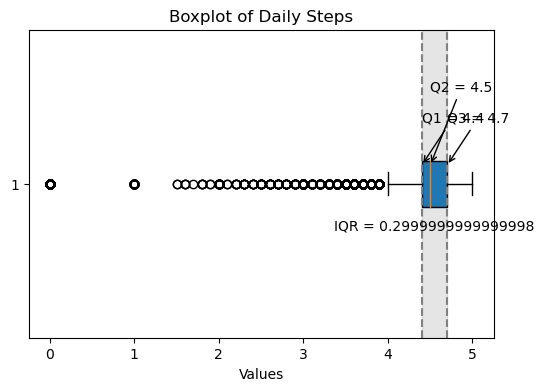

In [15]:
# Rating
q1 = df_drop['rating'].quantile(0.25)
q2 = df_drop['rating'].quantile(0.5)
q3 = df_drop['rating'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

plt.figure(figsize=(6, 4))
plt.boxplot(df_drop['rating'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Daily Steps')

plt.show()

Q1: 8.99
Q2: 11.99
Q3: 17.99
Interquartile Range (IQR): 8.999999999999998


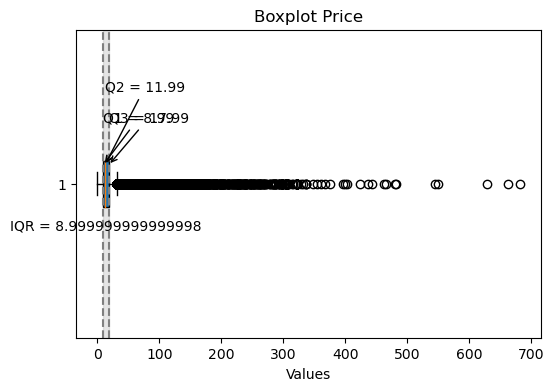

In [63]:
# Price
q1 = df_drop['price'].quantile(0.25)
q2 = df_drop['price'].quantile(0.5)
q3 = df_drop['price'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

plt.figure(figsize=(6, 4))
plt.boxplot(df_drop['price'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot Price')

plt.show()

Berdasarkan dari hasil perhitungan standard deviasi, skewness, dan juga membuat visualisasi menggunakan box plot, dapat dikatakan pada data keduanya, yaitu rating dan price terdapat extreme values atau outiers. Banyak faktor-faktor yang ditemukan yang membuat munculnya extreme values ini, pertama adalah, masih banyak nilai yang diluar Quartile, sebagai contoh pada column rating, untuk price maksimum pada seluruh data adalah 17.99, namun ada sebagian juga buku yang memiliki nilai lebih dari Quartile 3 / Nilai maksimum.

Outliers atau extreme values dapat muncul jika ada nilai yang kurang atau lebih dari masing-masing nilai minimum dan nilai maksimum. Untuk menghindari outliers ini agar mempermudah hasil visualisasi, maka perlu dilakukannya handling outliers/handling extreme values.

- Handling Outliers

Handling outliers ini bertujuan untuk mempermudah analisa, dimana handling outliers ini akan menghilangkan data-data yang melebihi batas quartile, dengan menghilangkan dapat mempengaruhi analisa statistik, dan juga mengurangi tingkat ketidak akuratan data. dibawah ini akan dilakukan proses handling outliers dari column price dan rating.

In [41]:
# Rating
''' 
Proses ini diawali dengan mencari nilai Q1 (Quartile 1), Q2 (Quartile 2), dan Q3 (Quartile 3), dimana masing-masing quartile ini akan menentukan nilai minimum dan maksimum data. Dan juga setelah mendapatkan nilai quartile, maka perlu mencari nilai IQR (Interquartile Range)
'''
q1 = df_drop['rating'].quantile(0.25)
q2 = df_drop['rating'].quantile(0.5)
q3 = df_drop['rating'].quantile(0.75)

iqr = q3 - q1

# Menentukan upper dan lower bound
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_rate = (df_drop['rating'] < lower_bound) | (df_drop['rating'] > upper_bound)

# Menghapus Outliers dan Memasukan ke variable baru



In [62]:
# Price 
q1 = df_drop['price'].quantile(0.25)
q2 = df_drop['price'].quantile(0.5)
q3 = df_drop['price'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_price = (df_drop['price'] < lower_bound) | (df_drop['price'] > upper_bound)



In [43]:
df_clean = df_drop[~(outliers_rate | outliers_price)]

- Hasil Sebelum dan Sesudah dihilangkan outliers

A. Central Tendency (Mean, Median, Modus)

In [19]:
# Rating
print('Sebelum Handling: ')
print('Rating rata-rata:',df_drop['rating'].mean())
print('Median rating:',df_drop['rating'].median())
print('Rating mode:',df_drop['rating'].mode().values[0])

print('\nSesudah Handling: ')
print('Rating rata-rata:',df_clean['rating'].mean())
print('Median rating:',df_clean['rating'].median())
print('Rating mode:',df_clean['rating'].mode().values[0])

Sebelum Handling: 
Rating rata-rata: 4.371353470437018
Median rating: 4.5
Rating mode: 4.6

Sesudah Handling: 
Rating rata-rata: 4.4100203154875715
Median rating: 4.5
Rating mode: 4.6


In [20]:
# price
print('Sebelum Handling: ')
print('price rata-rata:',df_drop['price'].mean())
print('Median price:',df_drop['price'].median())
print('price mode:',df_drop['price'].mode().values[0])

print('\nSesudah Handling: ')
print('price rata-rata:',df_clean['price'].mean())
print('Median price:',df_clean['price'].median())
print('price mode:',df_clean['price'].mode().values[0])

Sebelum Handling: 
price rata-rata: 19.363574035989718
Median price: 11.99
price mode: 9.99

Sesudah Handling: 
price rata-rata: 11.616819281787764
Median price: 10.675
price mode: 9.99


Setelah dilakukannya proses handling outliers, pada central tendency untuk rating perubahannya tidak terlalu signifikan antara mean dan median, namun perbedaan antara mean dan median pada rating semakin mendekati.

dan dilakukan juga proses handling outliers pada column price, pada column ini terjadi perubahan yang signifikan antara mean dengan median, dimana pada saat sebelum dilakukan handling, perbedaan antara kedua nilai tersebut terbilang cukup jauh, namun setelah dilakukannya handling outliers, jarak antara kedua nilai tersebut hampir mendekati.

B. Standard Deviasi dan Skewness

In [22]:
# Rating
print('Sebelum Handling: ')
std = df_drop['rating'].std()
print('Standard Deviation:',std)
print(f"Skewness: {df_drop['rating'].skew()}")

print('\nSetelah Handling: ')
std = df_clean['rating'].std()
print('Standard Deviation:',std)
print(f"Skewness: {df_clean['rating'].skew()}")

Sebelum Handling: 
Standard Deviation: 0.8276810493657302
Skewness: -4.4766444500430245

Setelah Handling: 
Standard Deviation: 0.7197921561016277
Skewness: -5.098986057728547


In [23]:
# price
print('Sebelum Handling: ')
std = df_drop['price'].std()
print('Standard Deviation:',std)
print(f"Skewness: {df_drop['price'].skew()}")

print('\nSetelah Handling: ')
std = df_clean['price'].std()
print('Standard Deviation:',std)
print(f"Skewness: {df_clean['price'].skew()}")

Sebelum Handling: 
Standard Deviation: 26.330843913797036
Skewness: 5.8661178296323895

Setelah Handling: 
Standard Deviation: 6.09736506082072
Skewness: 0.7540942474138086


Setelah dilakukan handling outliers pada rating dan price, pada rating perubahan pada standard deviasinya tidak terlalu signifikan namun mengalami kekurangan, yang menandakan variasi data semakin berkurang. namun pada skewness mengalami kekurangan yang signifikan.

Dan handling juga dilakukan pada column price, dimana standard deviasi menurun secara drastis, ini menandakan bahwa variasi data semakin berkurang, dan juga skewness mengalami penurunan yang cukup signifikan dari sebelumnya.

C. Quartile dan Boxplot setelah dihandling

- Rating Handling Outliers

Sebelum Handling: 
Q1: 4.4
Q2: 4.5
Q3: 4.7
Interquartile Range (IQR): 0.2999999999999998


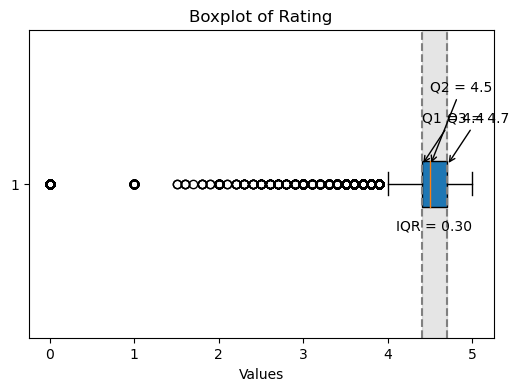

In [49]:
# Sebelum rating di handling outliers
print('Sebelum Handling: ')
q1 = df_drop['rating'].quantile(0.25)
q2 = df_drop['rating'].quantile(0.5)
q3 = df_drop['rating'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

plt.figure(figsize=(6, 4))
plt.boxplot(df_drop['rating'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('IQR = {:.2f}'.format(iqr), xy=((q1 + q3) / 2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Rating')

plt.show()

Sebelum dilakukan handling outliers, pada visualisasi box plot terlihat masih ada keterdapatannya outlier, dimana nilai outliers ini terdapat dibawah nilai, Q1. ini menandakan masih banyak rating yang lebih rendah dari 4.4. Dan dapat disimpulkan juga buku didominasi oleh nilai rating yang tinggi.

Sesudah Handling: 
Q1: 4.4
Q2: 4.6
Q3: 4.7
Interquartile Range (IQR): 0.2999999999999998


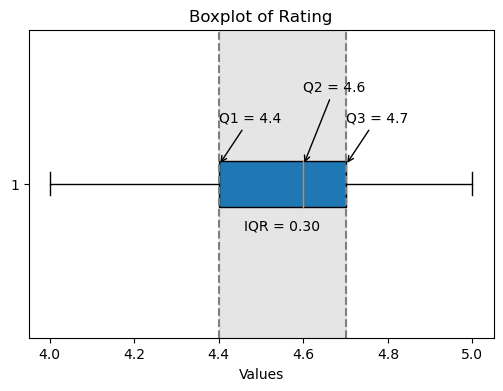

In [48]:
# Sesudah rating di handling outliers
print('Sesudah Handling: ')
q1 = df_clean['rating'].quantile(0.25)
q2 = df_clean['rating'].quantile(0.5)
q3 = df_clean['rating'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

plt.figure(figsize=(6, 4))
plt.boxplot(df_clean['rating'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('IQR = {:.2f}'.format(iqr), xy=((q1 + q3) / 2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Rating')

plt.show()

Setelah dilakukan handling outliers terhadap nilai rating, hasil dari boxplot sudah dikatakan dapat lebih mudah untuk dilakukan analisa. Untuk hasil terlihat jelas tidak ada perbedaan yang signifikan, atau dapat dikatan mendekati sama.

- Price Handling Outliers

Sebelum Handling: 
Q1: 8.99
Q2: 11.99
Q3: 17.99
Interquartile Range (IQR): 8.999999999999998


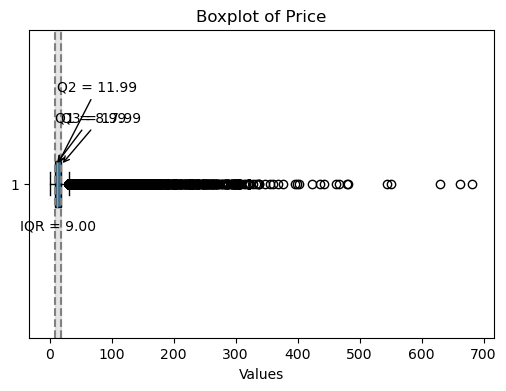

In [46]:
# Sebelum Price di handling outliers
print('Sebelum Handling: ')
q1 = df_drop['price'].quantile(0.25)
q2 = df_drop['price'].quantile(0.5)
q3 = df_drop['price'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

plt.figure(figsize=(6, 4))
plt.boxplot(df_drop['price'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('IQR = {:.2f}'.format(iqr), xy=((q1 + q3) / 2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Price')

plt.show()

Data price sebelum dilakukan handling outliers atau extreme values, dapat terlihat jelas pada boxplot bahwa masih banyak sekali harga buku yang melebihi nilai batas maksimum atau Q3. Untuk menghindari hal ini terjadi maka perlu dilakukan handling outliers

Sesudah Handling: 
Q1: 7.99
Q2: 10.99
Q3: 14.91
Interquartile Range (IQR): 6.92


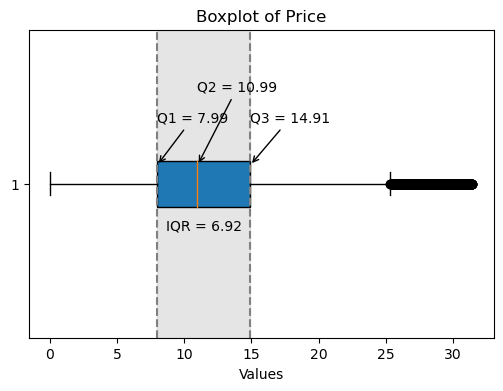

In [47]:
# Sesudah Price di handling outliers
print('Sesudah Handling: ')
q1 = df_clean['price'].quantile(0.25)
q2 = df_clean['price'].quantile(0.5)
q3 = df_clean['price'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR): {:.2f}'.format(iqr))

plt.figure(figsize=(6, 4))
plt.boxplot(df_clean['price'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('IQR = {:.2f}'.format(iqr), xy=((q1 + q3) / 2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Price')

plt.show()

Setelah dilakukan handling outliers, didapatkan bahwa visualisasi boxplot terlihat lebih proper, terlihat jelas bahwa nilai Quartile mengalami perubahan yang tidak terlalu signifikan namun sudah mengabaikan sebagian outliers.

**4. Harga Buku Dengan Rating Lebih Dari 4.5**

Pada proses ini, akan mencari berapa harga rata-rata dari buku yang memiliki rating lebih dari 4.5. Buku dengan rating diatas 4.5 dianggap sebagai buku yang paling disukai.

Harga rata-rata buku dengan rating tinggi: $ 12.33


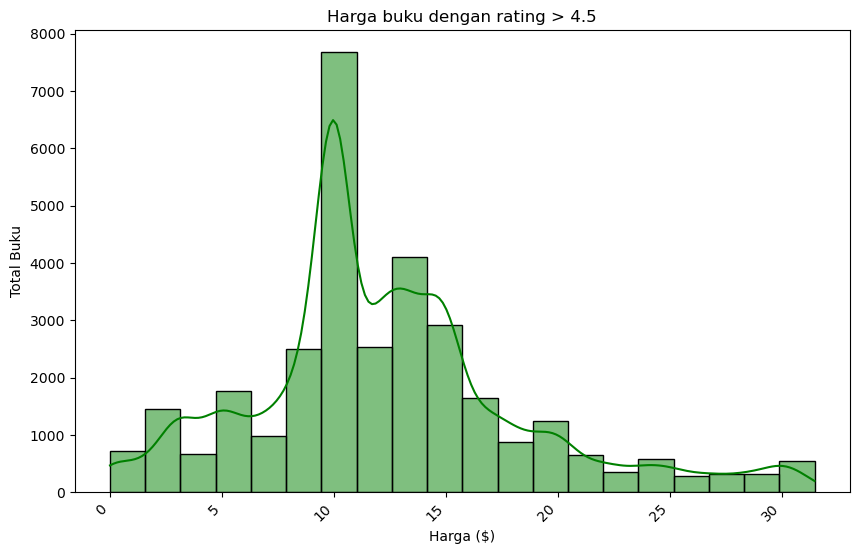

In [50]:
buku_rating_tinggi = df_clean[df_clean['rating'] > 4.5]

# Menghitung rata-rata harga dari buku dengan rating tinggi
average_price_successful = buku_rating_tinggi['price'].mean()
print(f"Harga rata-rata buku dengan rating tinggi: $ {average_price_successful:.2f}")

# Membuat histogram
plt.figure(figsize=(10, 6))
sns.histplot(buku_rating_tinggi['price'], bins=20, kde=True, color='green')
plt.title('Harga buku dengan rating > 4.5')
plt.xlabel('Harga ($)')
plt.ylabel('Total Buku')

plt.xticks(rotation=45, ha='right')  # Untuk mengatur kemiringan kata

plt.show()

Berdasarkan dari histogram, didapatkan bahwa buku dengan rating >4.5 rata-rata memiliki harga sebesar $19.09. Dapat dikatakan bahwa rentang harga untuk buku dengan rating terbaik sekitar $19.09.

**5. Genre/Category yang paling sering muncul pada buku dengan rating lebih dari 4.5**

Bagian ini bertujuan untuk mengetahui genre buku yang paling muncul pada rating yang lebih dari 4.5 atau buku terbaik. Proses ini menggunakan proses membandingkan antara rating dengan best seller.

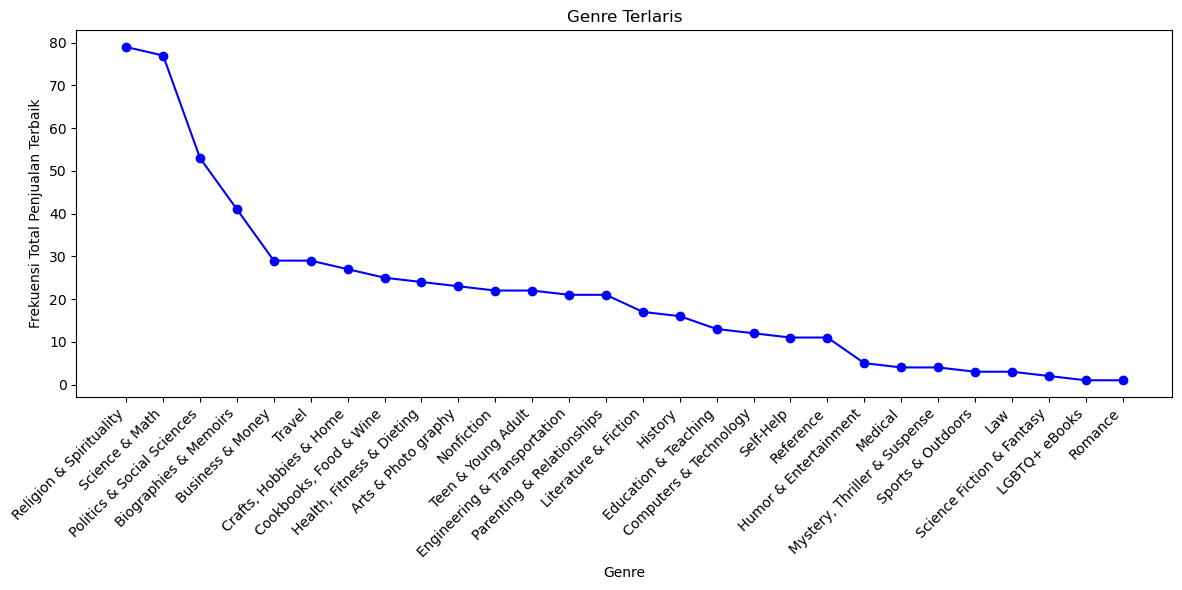

In [65]:
# Filter rows buku terbaik dengan rating > 4.5
buku_terbaik = df_clean[(df_clean['rating'] > 4.5) & (df_clean['isBestSeller'] == True)]

# Get the genre distribution
genre_terbaik = buku_terbaik['category_name'].value_counts()

# Sort genres by count in descending order
genre_terbaik = genre_terbaik.sort_values(ascending=False)

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(genre_terbaik.index, genre_terbaik.values, marker='o', linestyle='-', color='b')
plt.title('Genre Terlaris')
plt.xlabel('Genre')
plt.ylabel('Frekuensi Total Penjualan Terbaik')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()  # Ensures proper layout
plt.show()

Berdasarkan dari line chart ini dengan membandingkan antara rating dan best seller, dapat dilihat bahwa untuk TOP 3 genre terbaik dari seluruh penjualan adalah *Religion & Spirituality*, *Science & Math*, dan *Politics & Social Sciences*.

**6. Total Buku dengan Rating >= 4.5 pada tahun 2020 - 2023**


Pada bagian ini akan mencari total buku dengan rating lebih dari 4.5 dari tahun 2020 - 2023. Proses ini akan mendapatkan trend apakah semakin banyak buku yang memiliki rating tinggi setiap tahun, atau mengalami penurunan, untuk menjawab pertanyaan ini, maka perlu dilakukan visualisasi data.

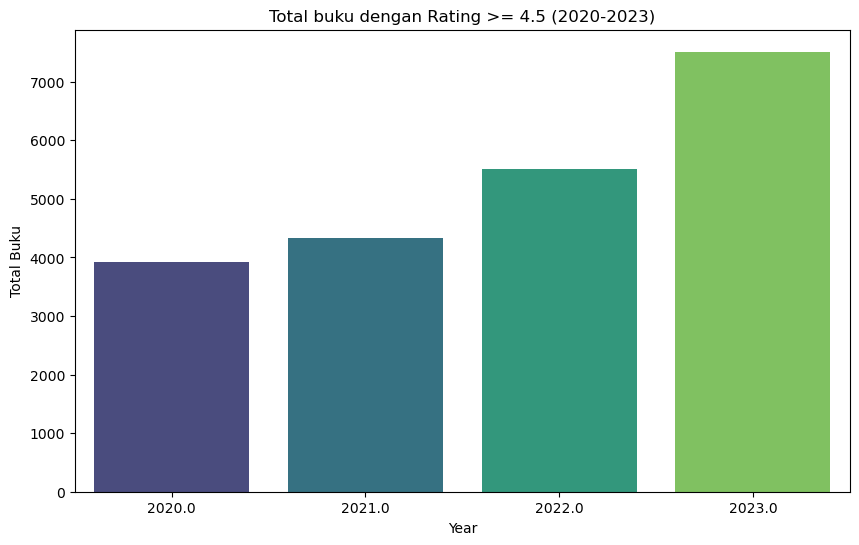

In [53]:
df_drop['publishedDate'] = pd.to_datetime(df_clean['publishedDate'])

# Extract the year from the datetime column
df_drop['year'] = df_clean['publishedDate'].dt.year

# Filter rows for the years 2020 to 2023 and rating >= 4.5
filtered_books = df_drop[(df_drop['year'].between(2020, 2023)) & (df_clean['rating'] >= 4.5)]

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=filtered_books, palette='viridis')
plt.title('Total buku dengan Rating >= 4.5 (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Total Buku')
plt.show()

Berdasarkan dari hasil histogram, dimana pada X axis adalah Tahun/Year, dan Y Axis adalah total buku. dapat dilihat bahwa dari tahun 2020 - 2023 mengalami peningkatan untuk total buku yang memiliki rating lebih dari 4.5. Hal ini menandakan bahwa pembaca merasa semakin menyukai kindle book setiap tahun.

**7. Confidential Interval Untuk Harga Yang Baik Dengan Range Confidence 95%**

95% Confidence Interval untuk harga: (10.95, 11.03)
Upper Bound: 10.95
Lower Bound: 11.03


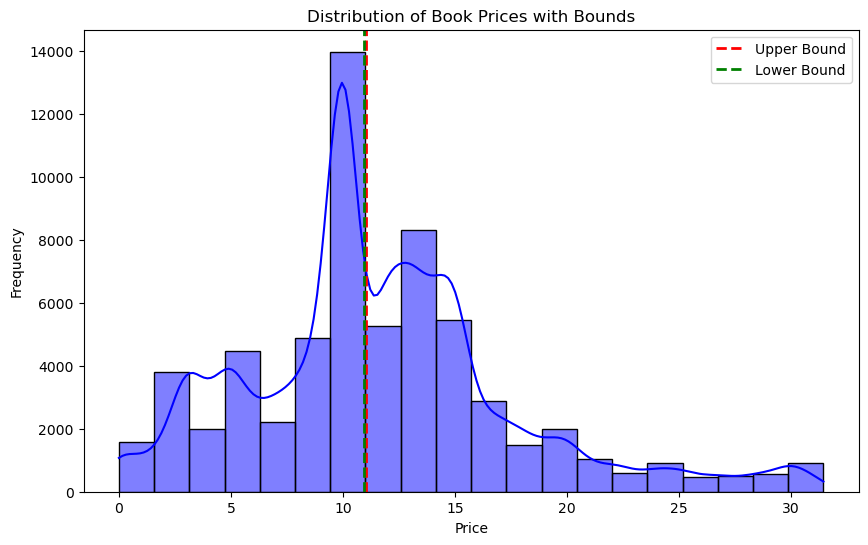

In [54]:
median_price = df_clean['price'].median()
q1, q3 = np.percentile(df_clean['price'], [25, 75])
iqr = q3 - q1
n = len(df_clean['price'])

# Calculate the upper and lower bounds
upper_bound = median_price + 1.7 * (1.25 * iqr / (1.35 * np.sqrt(n)))
lower_bound = median_price - 1.7 * (1.25 * iqr / (1.35 * np.sqrt(n)))

print(f"95% Confidence Interval untuk harga: ({lower_bound:.2f}, {upper_bound:.2f})")
print(f"Upper Bound: {lower_bound:.2f}")
print(f"Lower Bound: {upper_bound:.2f}")

# Visualize the distribution with the bounds
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['price'], bins=20, kde=True, color='blue')
plt.title('Distribution of Book Prices with Bounds')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot the bounds as vertical lines
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound')
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=2, label='Lower Bound')

plt.legend()
plt.show()

Berdasarkan dari hasil perhitungan diatas bahwa interval confidence sebesar 95% terdapat di rentan harga $10.95 sampai $11.03. 

**8. Korelasi antara rating dengan harga**

Korelasi antara rating dengan harga perlu dilakukan untuk mengetahui apakah rating tinggi mempengaruhi harga. Korelasi ini menggunakan korelasi spearman. Diasumsikan H0 atau Null Hypothesis adalah 'tidak adanya korelasi antara price dan rating, dan H1 atau Alternative Hypothesis adalah ' adanya korelasi antara price dan rating.

    - H1 = Tidak adanya korelasi antara price dan rating
    - H1 = Adanya korelasi antara price dan rating

In [56]:
corr_rho, pval_s = stats.spearmanr(df_clean['price'], df_clean['rating'])

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: 0.12, p-value: 8.737861934742048e-192


Berdasarkan dari perhitungan korelasi ini, didapatkan nilai ρ(rho) sebesar 0.12, dan p-value sebesar 8.737861934742048e-192. Ini artinya ketika harga bertambang, rating juga akan bertambah, tetapi hubungan antaranya tidak terlalu kuat. Dan P-Value memiliki nilai yang rendah. Ini menandakan bahwa berdasarkan dari P-Value, maka H0 tidak memenuhi, yang artinya antara rating dan price memiliki korelasi, walaupun tidak terlalu kuat.

# PENGAMBILAN KEPUTUSAN

Tujuan dari analisa ini adalah mendapatkan insight untuk mengetahui genre terbaik yang dipilih oleh pembaca berdasarkan dari rating dan best seller pada penjualan kindle book.

Berdasarkan dari hasil analisa ini adalah:  

    - Top 3 Genre : *Religion & Spirituality*, *Science & Math*, dan *Politics & Social Sciences*.
    
    - Harga Terbaik : $10.95 - $11.03

    - Publisher Terbaik : Amazon.com services LLC, Hachette Book, dan Simon and Shuster

Untuk mendapatkan target penjualan terbaik berdasarkan dari analisa, user dapat merekomendasikan kepada author atau publisher untuk mengambil antara genre *Religion & Spirituality*, *Science & Math*, dan *Politics & Social Sciences*, karena tingkat penjualan dan rating tertinggi 3 teratas adalah genre tersebut. Dengan rentan harga terbaik yaitu antara $10.95 sampai $11.03. Harga ini sudah diperhitungkan berdasarkan dari harga kindle book yang direkomendasi oleh best seller dengan rating tertinggi. Dan publisher terbaik dengan SUM price tertinggi diantaranya Amazon.com services LLC, Hachette Book, dan Simon and Shuster.